In [1]:
import os
main_dir = os.path.dirname(os.path.dirname(os.getcwd()))
os.chdir(main_dir)

import pyvdirs.dirs as dirs
import sys
sys.path.insert(0, dirs.SYSTEM_HOME)
sys.path.insert(0, os.path.join(dirs.SYSTEM_HOME, "ToyExample"))

import os
import numpy as np

import karras.dnnlib as dnnlib
import Images.calculate_metrics as calc
import ours.visualize as vis
import Images.generate_images as gen

%load_ext autoreload
%autoreload 2

/home/valeria/anaconda3/envs/SCIDev/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## General

### Parameters

In [2]:
image_path = "Images/04_Tiny_LR/Baseline/04/gen_images/network-snapshot-0039500-0.100"

#### Derived parameters

In [3]:
dataset_name = "generated"
image_path = os.path.join(dirs.MODELS_HOME, image_path)

### Load generated data

In [33]:
dataset_kwargs = calc.get_dataset_kwargs(dataset_name, image_path=image_path)
dataset_obj = dnnlib.util.construct_class_by_name(**dataset_kwargs, random_seed=0)

### Plot generated data

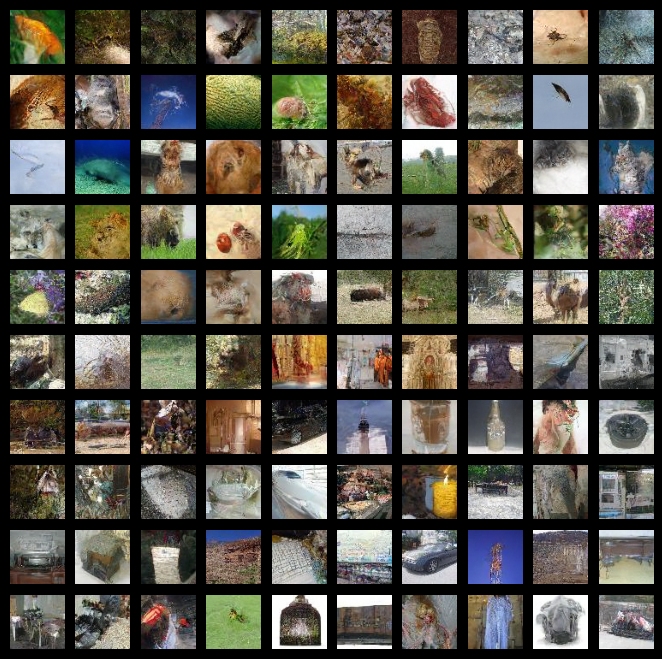

In [4]:
vis.visualize_images(dataset_obj, np.arange(100), n_cols=10);

In [5]:
dataset_obj.get_words_from_label(17)

'Spiny lobster, langouste, rock lobster, crawfish, crayfish, sea crawfish'

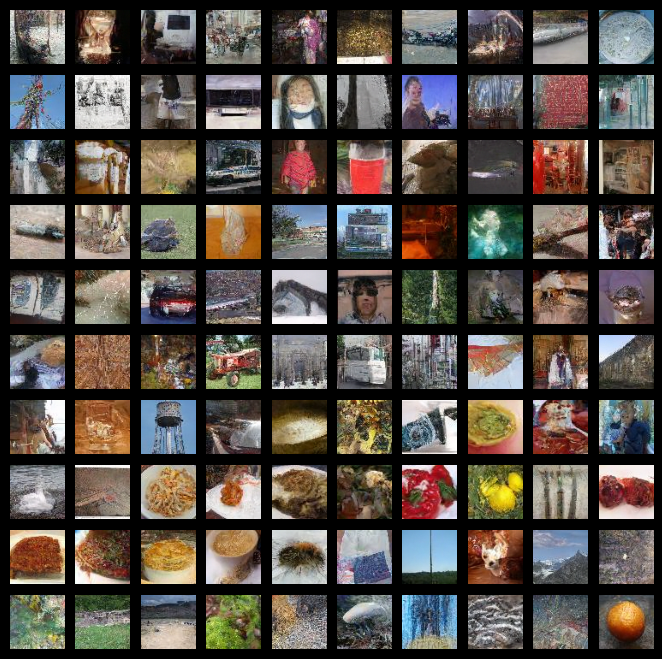

In [6]:
vis.visualize_images(dataset_obj, np.arange(100,200), n_cols=10);

In [21]:
dataset_obj.get_words_from_label(109)

'Magnetic compass'

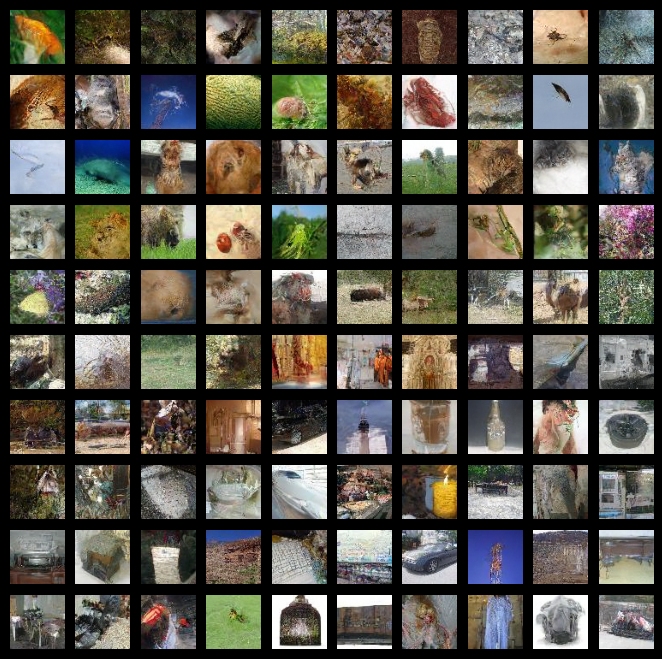

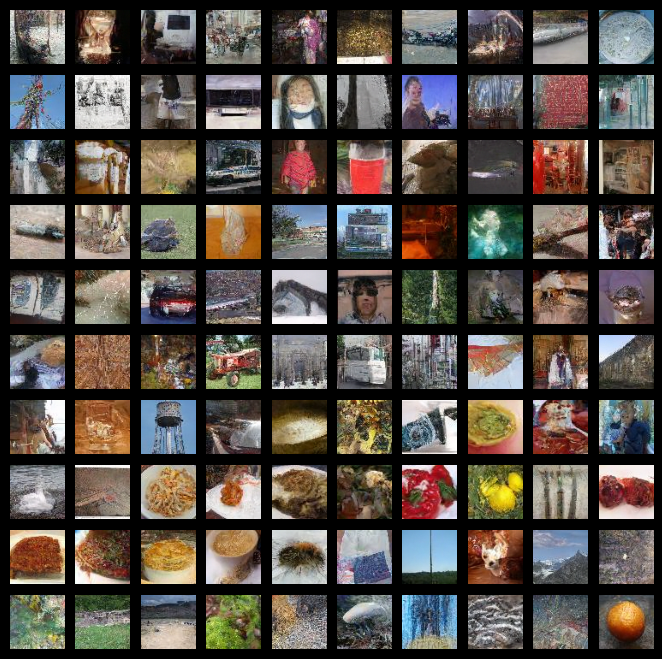

In [ ]:
gen.visualize_generated_images(image_path)

# save_path = image_path.replace("gen_images", "gen_visualization")
# os.makedirs(save_path, exist_ok=True)
# gen.visualize_generated_images(image_path, save_dir=save_path, tight_layout=True, plot_labels=True)

## Stochastic sampler test

In [40]:
super_dir = os.path.join(dirs.RESULTS_HOME, "Images", "02_Stochastic_Sampler")

In [42]:
series = os.listdir(super_dir)
series

['ImageNet_Theirs', 'CIFAR10_VP', 'CIFAR10_VE', 'ImageNet_PreTrained']

In [ ]:
for s in series:
    image_path = os.path.join(super_dir, s)
    save_path = os.path.join(super_dir, "visualize", s)
    os.makedirs(save_path, exist_ok=True)
    gen.visualize_generated_images(image_path, save_dir=save_path, tight_layout=True, plot_labels=True)